<a href="https://colab.research.google.com/github/singhbhupender1/ML-notebooks/blob/master/Evaluate_Pixel_Scaling_Methods_for_Image_Classification_With_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Procedure for Choosing a Pixel Scaling Method

**Given a new image classification task, what pixel scaling methods should be used?**

**This can be achieved using the following process:**

**Step 1: Choose Dataset. This may be the entire training dataset or a small subset. The idea is to complete the experiments quickly and get a result.**

**Step 2: Choose Model. Design a model that is skillful, but not necessarily the best model for the problem. Some parallel prototyping of models may be required.**

**Step 3: Choose Pixel Scaling Methods. List 3-5 data preparation schemes for evaluation of your problem.**

**Step 4: Run Experiment. Run the experiments in such a way that the results are robust and representative, ideally repeat each experiment multiple times.**

**Step 5: Analyze Results. Compare methods both in terms of the speed of learning and mean performance across repeated experiments.**

**you are looking for a signal that one data preparation scheme for your images is clearly better than the others; if this is not the case for your dataset, then the simplest (least computationally complex) technique should be used, such as pixel normalization.**

**A clear signal of a superior pixel scaling method may be seen in one of two ways:**

**Faster Learning. Learning curves clearly show that a model learns faster with a given data preparation scheme.**

**Better Accuracy. Mean model performance clearly shows better accuracy with a given data preparation scheme.**

##Step 1. Choose Dataset: MNIST Image Classification

**The MNIST problem, or MNIST for short, is an image classification problem comprised of 70,000 images of handwritten digits.**

**The goal of the problem is to classify a given image of a handwritten digit as an integer from 0 to 9. As such, it is a multiclass image classification problem.**

**This dataset is provided as part of the Keras library and can be automatically downloaded (if needed) and loaded into memory by a call to the keras.datasets.mnist.load_data() function.**

**The function returns two tuples: one for the training inputs and outputs and one for the test inputs and outputs. For example:**

In [3]:
#load and summarize the MNIST dataset
from keras.datasets import mnist
#load the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#summarize the dataset shape
print('Train', train_images.shape, train_labels.shape)
print('Test', test_images.shape, test_labels.shape)
#summerize pixels shape
print('Train', train_images.min(), train_images.max(), train_images.mean(), train_images.std())
print('Train', test_images.min(), test_images.max(), test_images.mean(), test_images.std())

Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)
Train 0 255 33.318421449829934 78.56748998339798
Train 0 255 33.791224489795916 79.17246322228644


##Step 2. Choose Model: Convolutional Neural Network

**We will use a convolutional neural network model to evaluate the different pixel scaling methods.**

**A CNN is expected to perform very well on this problem, although the model chosen for this experiment does not have to perform well or best for the problem. Instead, it must be skillful (better than random) and must allow the impact of different data preparation schemes to be differentiated in terms of speed of learning and/or model performance.**

**We will demonstrate the baseline model on the MNIST problem.**

**First, the dataset must be loaded and the shape of the train and test dataset expanded to add a channel dimension, set to one as we only have a single black and white channel.**

In [0]:
#load the datast
(trainX, trainY), (testX, testY) = mnist.load_data()
#reshape dataset to have a single channel
width, height, channels = trainX.shape[1], trainX.shape[2], 1
trainX = trainX.reshape((trainX.shape[0], width, height, channels))
testX = testX.reshape((testX.shape[0], width, height, channels))

**Next, we will normalize the pixel values for this example and one hot encode the target values, required for multiclass classification.**

In [0]:
from keras.utils import to_categorical
#normalize pixel values
trainX = trainX.astype('float32') / 255
testX = testX.astype('float32') /255
#one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

**The model is defined as a convolutional layer followed by a max pooling layer; this combination is repeated again, then the filter maps are flattened, interpreted by a fully connected layer and followed by an output layer.**

**The ReLU activation function is used for hidden layers and the softmax activation function is used for the output layer. Enough filter maps and nodes are specified to provide sufficient capacity to learn the problem.**



```
# define model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, channels)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
```



**The Adam variation of stochastic gradient descent is used to find the model weights. The categorical cross entropy loss function is used, required for multi-class classification, and classification accuracy is monitored during training.**



```

# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
```



**The model is fit for five training epochs and a large batch size of 128 images is used.**



```
# fit model
model.fit(trainX, trainY, epochs=5, batch_size=128)
```



**Once fit, the model is evaluated on the test dataset.**



```
# evaluate model
_, acc = model.evaluate(testX, testY, verbose=0)
print(acc)
```



**The complete example is listed below**

In [10]:
# baseline cnn model for the mnist problem
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
# load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()
# reshape dataset to have a single channel
width, height, channels = trainX.shape[1], trainX.shape[2], 1
trainX = trainX.reshape((trainX.shape[0], width, height, channels))
testX = testX.reshape((testX.shape[0], width, height, channels))
# normalize pixel values
trainX = trainX.astype('float32') / 255
testX = testX.astype('float32') / 255
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)
# define model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, channels)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# fit model
model.fit(trainX, trainY, epochs=5, batch_size=128)
# evaluate model
_, acc = model.evaluate(testX, testY, verbose=0)
print(acc)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/5





60000/60000 [==============================] - 44s 739us/step - loss: 0.2384 - acc: 0.9349
Epoch 2/5
60000/60000 [==============================] - 44s 726us/step - loss: 0.0607 - acc: 0.9818
Epoch 3/5
60000/60000 [==============================] - 44s 725us/step - loss: 0.0435 - acc: 0.9863
Epoch 4/5
60000/60000 [==============================] - 44s 730us/step - loss: 0.0345 - acc: 0.9893
Epoch 5/5
60000/60000 [==============================] - 44s 733us/step - loss: 0.0270 - acc: 0.9917
0.9904


**the performance of the model on the test dataset on this run is 99%, or a 1% error rate. This is not state of the art (by design), but is not terribly far from state of the art either.**

##Step 3. Choose Pixel Scaling Methods

**Neural network models often cannot be trained on raw pixel values, such as pixel values in the range of 0 to 255.**

**The reason is that the network uses a weighted sum of inputs, and for the network to both be stable and train effectively, weights should be kept small.**

**Instead, the pixel values must be scaled prior to training. There are perhaps three main approaches to scaling pixel values; they are:**

**Normalization: pixel values are scaled to the range 0-1.**

**Centering: the mean pixel value is subtracted from each pixel value resulting in a distribution of pixel values centered on a mean of zero.**

**Standardization: the pixel values are scaled to a standard Gaussian with a mean of zero and a standard deviation of one.**

**Traditionally, sigmoid activation functions were used and inputs that sum to 0 (zero mean) were preferred. This may or may not still be the case with the wide adoption of ReLU and similar activation functions.**

**Further, in centering and standardization, the mean or mean and standard deviation can be calculated across a channel, an image, a mini-batch, or the entire training dataset. This may add additional variations on a chosen scaling method that may be evaluated.**

**Normalization is often the default approach as we can assume pixel values are always in the range 0-255, making the procedure very simple and efficient to implement.**

**Centering is often promoted as the preferred approach as it was used in many popular papers, although the mean can be calculated per image (global) or channel (local) and across the batch of images or the entire training dataset, and often the procedure described in a paper does not specify exactly which variation was used.**

**We will experiment with the three approaches listed above, namely normalization, centering, and standardization. The mean for centering and the mean and standard deviation for standardization will be calculated across the entire training dataset.**

**Other variations you could explore include:**

**Calculating statistics for each channel (for color images).**

**Calculating statistics for each image.**

**Calculating statistics for each batch.**

**Normalizing after centering or standardizing.**

**The example below implements the three chosen pixel scaling methods and demonstrate their effect on the MNIST dataset.**

In [3]:
#demonstarte pixel scaling methods on mnist dataset
from keras.datasets import mnist
#normalise image
def prep_normalize(train, test):
    #convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    #normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    #return normalised images
    return train_norm, test_norm

#center images
def prep_center(train, test):
    #convert from integrs to floats
    train_cent = train.astype('float32')
    test_cent = test.astype('float32')
    #calculate statistics
    m = train_cent.mean()
    #center datasets
    train_cent = train_cent - m
    test_cent = test_cent - m
    #return normalized images
    return train_cent, test_cent

#standardize images
def prep_standardize(train, test):
    #convert from integers to floats
    train_stan = train.astype('float32')
    test_stan = test.astype('float32')
    #calculate statistics
    m = train_stan.mean()
    s = train_stan.std()
    #center datasets
    train_stan = (train_stan - m) /s
    test_stan = (test_stan - m) / s
    #return normalized images
    return train_stan, test_stan

#load dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#normalize
trainX, testX = prep_normalize(train_images, test_images)
print('normalization')
print('Train', trainX.min(), trainX.max(), trainX.mean(), trainX.std())
print('Test', testX.min(), testX.max(), testX.mean(), testX.std())
#center
trainX, testX = prep_center(train_images, test_images)
print('center')
print('Train', trainX.min(), trainX.max(), trainX.mean(), trainX.std())
print('Test', testX.min(), testX.max(), testX.mean(), testX.std())
#Standardize
trainX, testX = prep_standardize(train_images, test_images)
print('Standardize')
print('Train', trainX.min(), trainX.max(), trainX.mean(), trainX.std())
print('Test', testX.min(), testX.max(), testX.mean(), testX.std())


normalization
Train 0.0 1.0 0.13066062 0.30810776
Test 0.0 1.0 0.13251467 0.31048027
center
Train -33.318447 221.68155 -1.9512918e-05 78.567444
Test -33.318447 221.68155 0.47278798 79.17245
Standardize
Train -0.42407447 2.8215446 -3.4560264e-07 0.9999998
Test -0.42407447 2.8215446 0.0060174568 1.0077008


**Running the example first normalizes the dataset and reports the min, max, mean, and standard deviation for the train and test dataset.**

**This is then repeated for the centering and standardization data preparation schemes. The results provide evidence that the scaling procedures are indeed implemented correctly.**

##Step 4. Run Experiment

**Now that we have defined the dataset, the model, and the data preparation schemes to evaluate, we are ready to define and run the experiment.**

**We will evaluate each of the three data preparation schemes and each scheme will be evaluated 10 times**

**We can define a function to load the dataset afresh when needed.**



```
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	width, height, channels = trainX.shape[1], trainX.shape[2], 1
	trainX = trainX.reshape((trainX.shape[0], width, height, channels))
	testX = testX.reshape((testX.shape[0], width, height, channels))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY
```



**We can also define a function to define and compile our model ready to fit on the problem.**



```
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, channels)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(64, activation='relu'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
	return model
```



**We already have functions for preparing the pixel data for the train and test datasets.**

**Finally, we can define a function called repeated_evaluation() that takes the name of the data preparation function to call to prepare the data and will load the dataset and repeatedly define the model, prepare the dataset, fit, and evaluate the model. It will return a list of accuracy scores that can be used to summarize the performance of the model under the chosen data preparation scheme.**



```
# repeated evaluation of model with data prep scheme
def repeated_evaluation(datapre_func, n_repeats=10):
	# prepare data
	trainX, trainY, testX, testY = load_dataset()
	# repeated evaluation
	scores = list()
	for i in range(n_repeats):
		# define model
		model = define_model()
		# prepare data
		prep_trainX, prep_testX = datapre_func(trainX, testX)
		# fit model
		model.fit(prep_trainX, trainY, epochs=5, batch_size=64, verbose=0)
		# evaluate model
		_, acc = model.evaluate(prep_testX, testY, verbose=0)
		# store result
		scores.append(acc)
		print('> %d: %.3f' % (i, acc * 100.0))
	return scores
```



**The repeated_evaluation() function can then be called for each of the three data preparation schemes and the mean and standard deviation of model performance under the scheme can be reported.**

**We can also create a box and whisker plot to summarize and compare the distribution of accuracy scores for each scheme.**



```
all_scores = list()
# normalization
scores = repeated_evaluation(prep_normalize)
print('Normalization: %.3f (%.3f)' % (mean(scores), std(scores)))
all_scores.append(scores)
# center
scores = repeated_evaluation(prep_center)
print('Centered: %.3f (%.3f)' % (mean(scores), std(scores)))
all_scores.append(scores)
# standardize
scores = repeated_evaluation(prep_standardize)
print('Standardized: %.3f (%.3f)' % (mean(scores), std(scores)))
all_scores.append(scores)
# box and whisker plots of results
pyplot.boxplot(all_scores, labels=['norm', 'cent', 'stan'])
pyplot.show()
```



**the complete example of running the experiment to compare pixel scaling methods on the MNIST dataset is listed below.**

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








> 0: 99.190
> 1: 98.510
> 2: 99.050
> 3: 98.730
> 4: 98.890
> 5: 98.980
> 6: 99.050
> 7: 99.060
> 8: 98.990
> 9: 99.160
Normalization: 0.990 (0.002)
> 0: 50.770
> 1: 98.520
> 2: 98.840
> 3: 98.390
> 4: 9.800
> 5: 10.100
> 6: 98.430
> 7: 98.250
> 8: 98.630
> 9: 98.260
Centered: 0.760 (0.359)
> 0: 99.140
> 1: 99.070
> 2: 98.650
> 3: 99.080
> 4: 99.120
> 5: 99.050
> 6: 99.010
> 7: 98.630
> 8: 98.940
> 9: 99.040
Standardized: 0.990 (0.002)


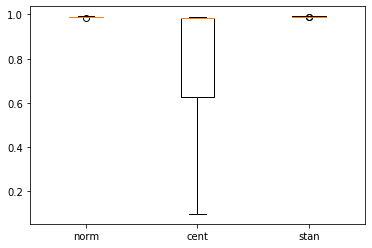

In [7]:
# comparison of training-set based pixel scaling methods on MNIST
from numpy import mean
from numpy import std
from matplotlib import pyplot
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
 
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	width, height, channels = trainX.shape[1], trainX.shape[2], 1
	trainX = trainX.reshape((trainX.shape[0], width, height, channels))
	testX = testX.reshape((testX.shape[0], width, height, channels))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY
 
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(64, activation='relu'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
	return model
 
# normalize images
def prep_normalize(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm
 
# center images
def prep_center(train, test):
	# convert from integers to floats
	train_cent = train.astype('float32')
	test_cent = test.astype('float32')
	# calculate statistics
	m = train_cent.mean()
	# center datasets
	train_cent = train_cent - m
	test_cent = test_cent - m
	# return normalized images
	return train_cent, test_cent
 
# standardize images
def prep_standardize(train, test):
	# convert from integers to floats
	train_stan = train.astype('float32')
	test_stan = test.astype('float32')
	# calculate statistics
	m = train_stan.mean()
	s = train_stan.std()
	# center datasets
	train_stan = (train_stan - m) / s
	test_stan = (test_stan - m) / s
	# return normalized images
	return train_stan, test_stan
 
# repeated evaluation of model with data prep scheme
def repeated_evaluation(datapre_func, n_repeats=10):
	# prepare data
	trainX, trainY, testX, testY = load_dataset()
	# repeated evaluation
	scores = list()
	for i in range(n_repeats):
		# define model
		model = define_model()
		# prepare data
		prep_trainX, prep_testX = datapre_func(trainX, testX)
		# fit model
		model.fit(prep_trainX, trainY, epochs=5, batch_size=64, verbose=0)
		# evaluate model
		_, acc = model.evaluate(prep_testX, testY, verbose=0)
		# store result
		scores.append(acc)
		print('> %d: %.3f' % (i, acc * 100.0))
	return scores
 
all_scores = list()
# normalization
scores = repeated_evaluation(prep_normalize)
print('Normalization: %.3f (%.3f)' % (mean(scores), std(scores)))
all_scores.append(scores)
# center
scores = repeated_evaluation(prep_center)
print('Centered: %.3f (%.3f)' % (mean(scores), std(scores)))
all_scores.append(scores)
# standardize
scores = repeated_evaluation(prep_standardize)
print('Standardized: %.3f (%.3f)' % (mean(scores), std(scores)))
all_scores.append(scores)
# box and whisker plots of results
pyplot.boxplot(all_scores, labels=['norm', 'cent', 'stan'])
pyplot.show()

##Step 5. Analyze Results

**The results of the experiments show that there is little or no difference (at the chosen precision) between pixel normalization and standardization with the chosen model on the MNIST dataset.**

**From these results, I would use normalization over standardization on this dataset with this model because of the good results and because of the simplicity of normalization as compared to standardization.**

**These are useful results in that they show that the default heuristic to center pixel values prior to modeling would not be good advice for this dataset.**

**Sadly, the box and whisker plot does not make a comparison between the spread of accuracy scores easy as some terrible outlier scores for the centering scaling method squash the distributions.**